# Telecom Churn Case Study

1. Defining the problem statement

2. Import Libraries

3. Read the data

4. Exploratory data analysis (EDA)

5. Data Visualization

6. Data Cleaning

7. Model Building

8. Testing

### Problem Statement

For Telecom companies it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations. The key challenge is to predict if an individual customer will churn or not. To accomplish that, machine learning models are trained based on 70% of the sample data. The remaining 30% are used to apply the test models and assess their predictive power with regards to “churn / not churn”.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Read dataset

* The data set for this classification problem is taken from Kaggle. (https://www.kaggle.com/blastchar/telco-customer-churn)

In [2]:
df = pd.read_csv("telco customer.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Exploration

In [3]:
# Check shape of data
df.shape

(7043, 21)

In [4]:
#check basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Here we can see 75% of peoples have tenure less than 55 months 
* Average Monthly charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month and maximum Monthly Charges is 118.75 USD.

In [6]:
#unique values of dataset
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis (EDA)

### Data Visualization

<Figure size 6000x3600 with 0 Axes>

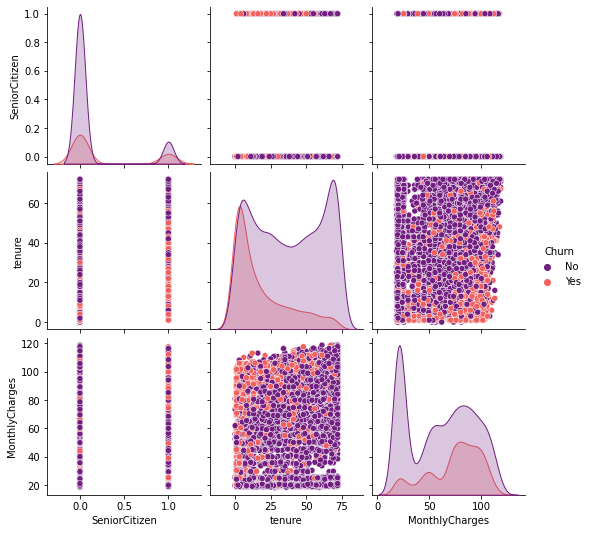

In [8]:
plt.figure(dpi=300, figsize=(20,12))
sns.pairplot(df,hue="Churn",palette="magma")

plt.show()

* Churn is high when Monthly Charges are high.

* Churn is high at starting tenure and churn is low as tenure increases.

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

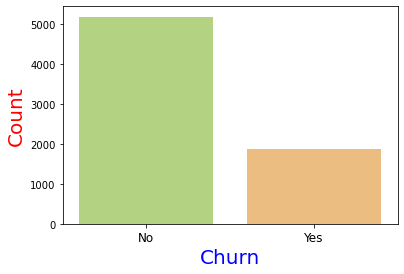

In [10]:
sns.countplot(x= "Churn", data= df, palette= "RdYlGn_r")

plt.xticks(fontsize = 12)
plt.xlabel("Churn", fontsize = 20, c= "b")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()
                        

Here we can see Churn data is imbalance. It shows No churn is high.

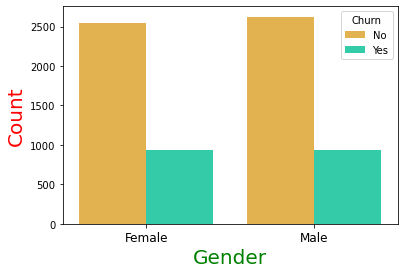

In [11]:
sns.countplot(x= "gender", data= df, hue = "Churn", palette= "turbo_r")


plt.xticks(fontsize = 12)
plt.xlabel("Gender", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

Churn in male and female is approximately same whereas in the No-churn male are more than female

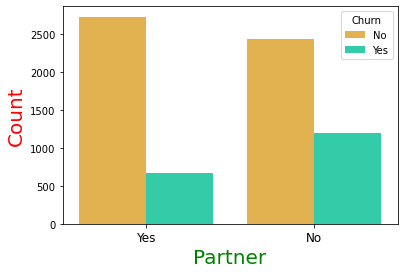

In [12]:

sns.countplot(x="Partner",hue="Churn",palette="turbo_r",data=df)

plt.xticks(fontsize = 12)
plt.xlabel("Partner", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

* People have partners are less churn.

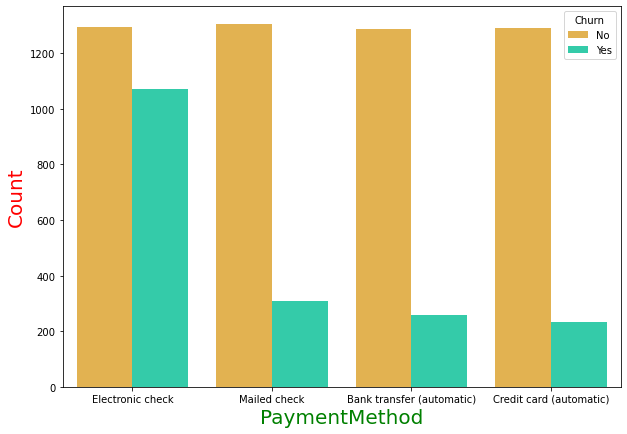

In [13]:
plt.figure(figsize= (10, 7))
sns.countplot(x="PaymentMethod",hue="Churn",palette="turbo_r",data=df)

plt.xticks(fontsize = 10)
plt.xlabel("PaymentMethod", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

* In Electronic check payment have high churn.

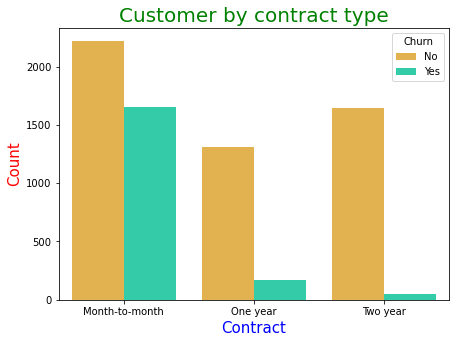

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x= "Contract", data= df ,palette="turbo_r", hue="Churn")

plt.xlabel("Contract", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Customer by contract type", fontsize = 20, c= "g")
plt.show()

*  Month to Month contract has high churn

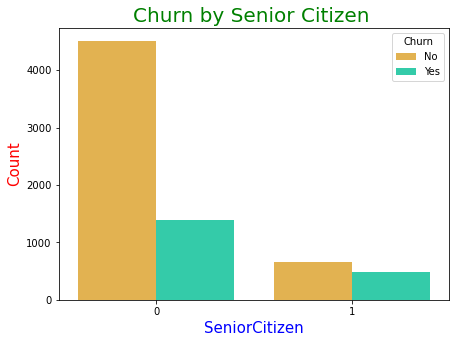

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x= "SeniorCitizen", data= df ,palette="turbo_r", hue="Churn")

plt.xlabel("SeniorCitizen", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Senior Citizen ", fontsize = 20, c= "g")
plt.show()

* Here we can see Senior Citizen has low churn

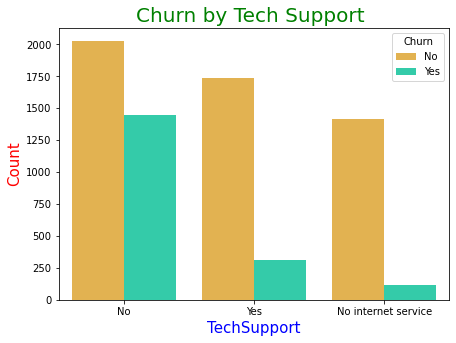

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x= "TechSupport", data= df ,palette="turbo_r", hue="Churn")

plt.xlabel("TechSupport", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Tech Support ", fontsize = 20, c= "g")
plt.show()

* No Tech support category has high Churn and No Internet service has low churn

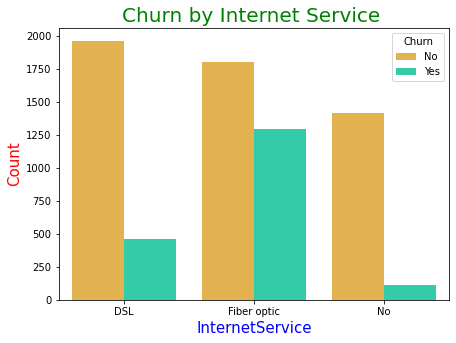

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x= "InternetService", data= df ,palette="turbo_r", hue="Churn")

plt.xlabel("InternetService", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Internet Service ", fontsize = 20, c= "g")
plt.show()

* Fiber Optic has high churn and No internet service has low churn

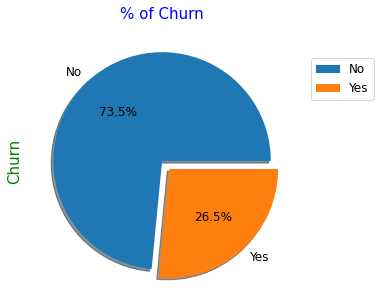

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12, explode = (0, 0.1), shadow=True )                                                                           

ax.set_ylabel('Churn',fontsize = 15, c = "g")
ax.set_title('% of Churn', fontsize = 15, c= "b")
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12)
plt.show()

df.Churn.value_counts()

* Here we can see Churn is 26.5% and No Churn is 73.5%. Data is imbalance.

### Data Cleaning

In [19]:
df.TotalCharges= pd.to_numeric(df.TotalCharges, errors="coerce")

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df.loc[df['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* In Total Charges columns **11 NaN** values Present. We have to drop that values for model building.

In [22]:
# Drop NaN values 
df.dropna(axis =0, inplace=True)

In [23]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### One Hot Encoding 

In [24]:
dummies=(["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
          "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
          "Contract","PaperlessBilling","PaymentMethod"])


In [25]:
# One Hot Encoding 
df_new = pd.get_dummies(df, columns=dummies, drop_first= True )
df_new.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [26]:
df_new.dtypes

customerID                                object
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No inter

Drop Unwanted columns 

In [27]:

df_new= df_new.drop(["customerID"], axis = 1)


In [28]:
df_new.head()


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,No,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,No,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,Yes,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


#### Converting Target Variable into Binary values Yes = 1, No = 0

In [29]:
df_new["Churn"]=np.where(df_new.Churn=="Yes",1,0)

In [30]:
df_new.Churn.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

**Correlation Analysis**

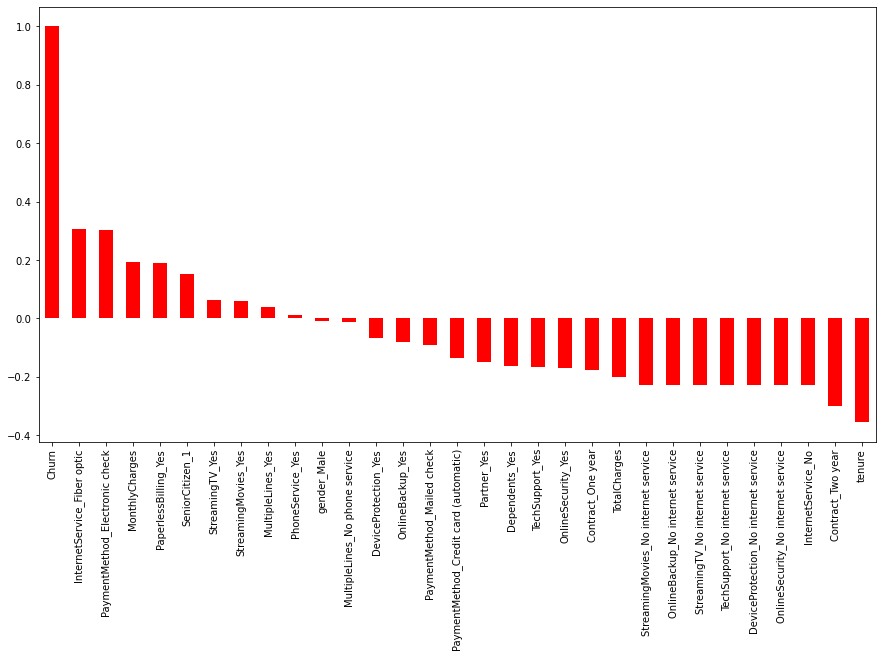

In [31]:
plt.figure(figsize=(15,8))
df_new.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color= "red")

plt.show()

## Model Building
Spliting up our data into an X array that contains the features to train and a y array with the target variable.

In [32]:
X = df_new.drop("Churn", axis =1)
X.shape

(7032, 30)

In [33]:
y = df_new["Churn"]
y.shape

(7032,)

### Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 1)

### Data Balancing

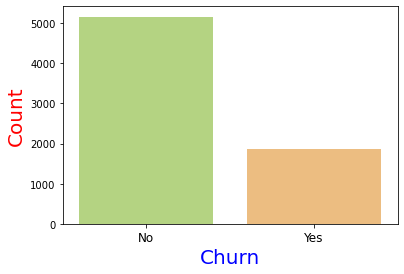

0    5163
1    1869
Name: Churn, dtype: int64

In [36]:
sns.countplot(x= "Churn", data= df, palette= "RdYlGn_r")

plt.xticks(fontsize = 12)
plt.xlabel("Churn", fontsize = 20, c= "b")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

df_new["Churn"].value_counts()

Here we can see Data is Imbalance

Implement Random Over Sampler for Balancing data

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
os = RandomOverSampler(random_state= 42)

In [39]:
X_res, y_res = os.fit_resample(X,y)

In [40]:
X_res.shape, y_res.shape

((10326, 30), (10326,))

In [41]:
# Check data is balnce or not
from collections import Counter
print('Original Dataset shape{}'.format(Counter(y)))
print("Resampled datset shape{}".format(Counter(y_res)))

Original Dataset shapeCounter({0: 5163, 1: 1869})
Resampled datset shapeCounter({0: 5163, 1: 5163})


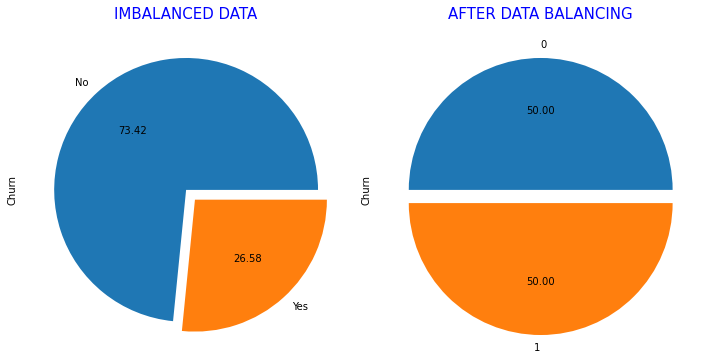

In [42]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("IMBALANCED DATA", fontsize = 15, c= "b")
df["Churn"].value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.subplot(1,2,2)
plt.title("AFTER DATA BALANCING", fontsize = 15, c= "b")
y_res.value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.tight_layout()

### Model building after balancing the data

In [43]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res,test_size=0.3,random_state=1)

**Importing libraries for classification report and a confusion matrix.**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()

In [47]:
lr.fit(Xr_train,yr_train)

LogisticRegression()

In [48]:
yr_pred=lr.predict(Xr_test)

In [49]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1574
           1       0.74      0.80      0.77      1524

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



In [50]:
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

Confusion Matrix: 
[[1157  417]
 [ 307 1217]]


Accuracy Score:  76.63008392511298


## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(Xr_train,yr_train)
yr_pred = dtree.predict(Xr_test)

In [53]:
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

Confusion Matrix: 
[[1252  322]
 [ 110 1414]]


Accuracy Score:  86.05551969012267


## Random forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(n_estimators=700)

In [56]:
rfc.fit(Xr_train,yr_train)

RandomForestClassifier(n_estimators=700)

In [57]:
yr_pred = rfc.predict(Xr_test)

In [58]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1574
           1       0.85      0.94      0.89      1524

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.89      0.89      0.89      3098



In [59]:
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

Confusion Matrix: 
[[1321  253]
 [  89 1435]]


Accuracy Score:  88.96061975468044


## Support Vector Machine

In [60]:
from sklearn.svm import SVC
svc = SVC()

In [61]:
svc.fit(Xr_train,yr_train)

SVC()

In [62]:
yr_pred = svc.predict(Xr_test)

In [63]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.68      1574
           1       0.67      0.61      0.63      1524

    accuracy                           0.66      3098
   macro avg       0.66      0.66      0.65      3098
weighted avg       0.66      0.66      0.66      3098



In [64]:
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

Confusion Matrix: 
[[1109  465]
 [ 600  924]]


Accuracy Score:  65.62298256939961


## Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(Xr_train, yr_train)

yr_pred = nb.predict(Xr_test)

In [66]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68      1574
           1       0.67      0.90      0.77      1524

    accuracy                           0.73      3098
   macro avg       0.76      0.73      0.72      3098
weighted avg       0.76      0.73      0.72      3098



In [67]:
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_pred))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_pred)*100)

Confusion Matrix: 
[[ 892  682]
 [ 157 1367]]


Accuracy Score:  72.91801162040026


## Results:

The accuracy of Logistic Regression is: **76.63 %**

The accuracy of Decision Tree Classifier is: **86.18 %**

The accuracy of Random Forest Classifier is: **88.63 %**

The accuracy of SVM is: **65.62 %**

The accuracy of Naive Bayes is: **72.91 %**

We can see here Accuracy of Random Forest Classifier is **88.63%**. Its higher than other models.

##  Testing Model

In [68]:
a= np.array(yr_test)
predicted = np.array(rfc.predict(Xr_test))
df_com=pd.DataFrame({"Original":a, "Predicted": predicted}, index= range(len(a)))
df_com.head(50)

,Original,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


# Model Created Successfully !

# Thank You!